# TO DO!

- figure out how to deal with the fact that data is not great!

In [23]:
require(ggplot2)
source("00_functions.R")


 loading required packages



## read in data

In [24]:
trees_df   = read.csv("../Results/trees_genus_matrix.csv", row.names=1)
mammals_df = read.csv("../Results/mammals_matrix.csv", row.names=1)
beetles_df = read.csv("../Results/beetles_matrix.csv", row.names=1)

In [25]:
pca.rslt_trees   = do_pca(trees_df, scale = F, plot = F)
pca.rslt_mammals = do_pca(mammals_df, scale = F, plot = F)
pca.rslt_beetles = do_pca(beetles_df, scale = F, plot = F)

# cat("Explained Varience Trees:")
# pca.rslt_trees@exp.var
# cat("Explained Varience Mammals:")
# pca.rslt_mammals@exp.var
# cat("Explained Varience Beetles:")
# pca.rslt_beetles@exp.var

In [26]:
hvs_rslts_trees   = hvs_rslts(pca.rslt_trees@axis, axis = c("PC1", "PC2", "PC3"), "seq")
hvs_rslts_mammals = hvs_rslts(pca.rslt_mammals@axis, axis = c("PC1", "PC2", "PC3"), "seq")
hvs_rslts_beetles = hvs_rslts(pca.rslt_beetles@axis, axis = c("PC1", "PC2", "PC3"), "seq")

# cat("\n\n")
# cat("Trees: ",   sum(is.na(hvs.rslts_trees@rslts$centroid_PC1))/nrow(hvs.rslts_trees@rslts), "\n")
# cat("Mammals: ", sum(is.na(hvs.rslts_mammals@rslts$centroid_PC1))/nrow(hvs.rslts_mammals@rslts), "\n")
# cat("Beetles: ", sum(is.na(hvs.rslts_beetles@rslts$centroid_PC1))/nrow(hvs.rslts_beetles@rslts))


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  36  of  36 :  E100-2_c2017
Comparing Hypervolume 30  of  30 :  E100-2_c2016-c2017

Building Hypervolume  60  of  60 :  VJR_P3
Comparing Hypervolume 40  of  40 :  VJR_P2-P3


In [8]:
# plot_hvs(hvs_rslts_trees)

In [27]:
beetles_cen = read.csv("../Results/beetles_census_dates.csv")
trees_cen   = read.csv("../Results/trees_census_dates.csv")
mammals_cen = read.csv("../Results/mammals_census_dates.csv")

btles = overlap_time(hvs_rslts_beetles@compare, beetles_cen)
trees = overlap_time(hvs_rslts_trees@compare, trees_cen)
mamls = overlap_time(hvs_rslts_mammals@compare, mammals_cen)

In [30]:
b = data.frame(group = "beetles", overlap = btles$overlap_time)
t = data.frame(group = "trees",   overlap = trees$overlap_time)
m = data.frame(group = "mammals", overlap = mamls$overlap_time)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

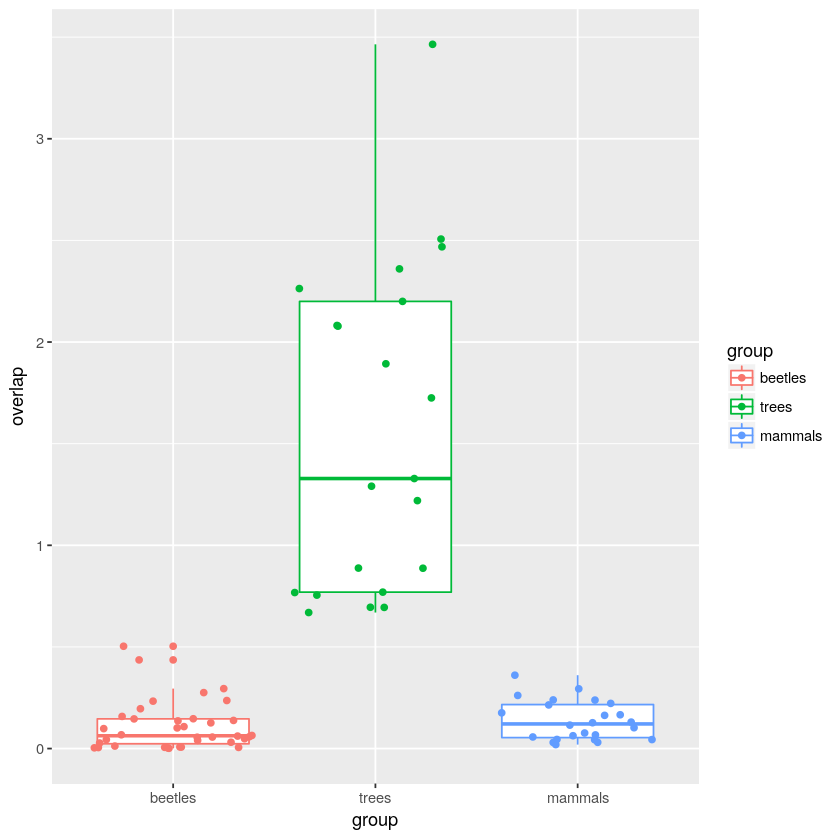

In [31]:
ggplot(data = whisker, aes(x = group, y = overlap, color = group)) + geom_boxplot() + geom_jitter()

## model???!!!

In [ ]:
attributes <- read.csv("../Results/trees_sorted.csv")
a = as.data.frame(attributes %>% group_by(plot_c) %>% summarise(stem_C = sum(stem_C)))

hvs_rslts_trees@rslts   = merge(hvs_rslts_trees@rslts, a, by = "plot_c", all.x = T)
# need to figure out compare - maybe do change in AGB too?
# hvs_rslts_trees@compare = merge(hvs_rslts_trees@compare, a, by = "plot_c", all.x = T)